## Business Understanding

#### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).

The dataset selected for this project was collected by the US Census Bureau and the Bureau of Labor Statistics over the course of 1994 and 1995 for the Current Population Survey (CPS). The main purpose of the CPS is to obtain current information on the status of the labor force in the United States. More specifically, this survey is conducted to enumerate the number of jobless and unemployed individuals as well as to get an idea about the social well-being of the citizens.

The Current Population Survey was developed in the late 1930s after the Great Depression, as prior there was not an effective technique to classify the labor force. A great need arose for a reliable survey of the population after this period of widespread unemployment. Previously, there were several indirect surveying techniques employed, however there were great discrepancies between these methods. The first surveys began in the 1940s and responsibility for conducting the survey has changed hands in the government, but currently, the survey portion is conducted by the US Census Bureau and the data is analyzed by the Bureau of Labor Statistics. 

The CPS is conducted monthly and is administered by asking a series of questions pertaining to socioeconomic factors of roughly 60,000 probability sampled households from all 50 states and the District of Columbia. Eligible candidates must be over the age of 15, not in the Armed Forces, or in an institution such as a prison, nursing home or long-term health care facility. Typically, labor force questions are asked pertaining to eligible workers in the household, in addition to supplemental questions asked that are of particular interest to labor force analysts. These subjects range greatly in the both the frequency in which they are asked, as in, annually, biannually, or one-time, as well the topics. Supplemental survey topics which vary monthly and cover questions relating to many differing topics, such as veterans status, child support, displaced workers, fertility, disability, school enrollment, just to name a few.

This data was obtained from the University of California Irvine Machine Learning repository, which a citation and a direct link to the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29). 

#### Describe how you would define and measure the outcomes from the dataset.

Due to the wide-ranging nature of this survey, outcomes derived from this data would be highly dependent on the questions at hand. For purposes of this study, the main goals will be a prediction on the income as a binomial response, above or below $50,000 annually and a prediction on the multinomial attribute of tax filer status. 

#### That is, why is this data important and how do you know if you have mined useful knowledge from the dataset?

This data is important because it allows labor force analysts to produce a statistical summary on questions of interest pertaining the United States workforce. The survey is a very useful tool that will provides insight into the social and economic status of the US population.

#### How would you measure the effectiveness of a good prediction algorithm? Be specific.

#### Predicting on Income 50k and Tax filer status

## Data Understanding

#### [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The census dataset was grabbed from the UCI Machine Learning repository. To learn more about this dataset please visit the hyperlink that is attached in the above segments. 

Overall this dataset includes about 40 attributes and all varying around census information around the year 2000. We decided to include almost all attributes to help us with our classification models in subsequent labs. Below is the high level breakdown of each attribute:

Attribute	        Type of Data	      Description
Age	                Nominal	         -Age of each individual
Class of Worker	    Nominal	         -This is the information of what industry the                                             person works in
Industry Code	    Integer	         -The code of the industry they work in, if                                               applicable
Occupation Code	    Integer	         -The code associated with their occupation
Education	        Nominal	         -The level of education the person received
Wage per hour	    Integer	         -How much the person makes per hour
Marital status	    Nominal	         -This is whether the person is married, single, or                                       divorced
Major Industry code 	Nominal	     -The actual description of the industy, e.g.                                             Construction, Finance, etc…
Major occupation code 	Nominal	     -Description of the role of the individual
Race 	                Nominal	     -Race of the individual e.g. Caucasian, Asian,                                           Hispanic, etc…
Hispanic Origin	        Nominal	     -Whether the individual has a hispanic origin
Sex	                    Binary	     -The gender of the individual, Male or Female
Member_of_labor union	Nominal	     -This tells us if they are a member of a labor                                           union
Reason for unemployment	 
                        Nominal	     -The reason for unemployment if not employed
Full or part time employment stat	
                        Nominal	     -The working status of the individual
Capital gains	        Integer	     -Their overall capital gains this year
Capital losses 	        Integer	     -The overall loss to the capital gains
Dividends from stocks	Integer	     -The return that was gained if the individual owns                                       any stocks
		
Tax filer status 	    Binary	     -This is the current status for their tax filing
Region of previous residence	
                        Nominal	     -The region the individual lived in before
State of previous residence 	
                        Nominal	     -The state the individual lived previously, if                                           applicable
Detailed household and family stat	
                        Nominal	     -Statistic of the individual in a household and the                                       family as a whole
Detailed household summary in household	
                        Nominal	     -Overall summary that closely depicts the members                                         of the household
Instance weight 	    Double	     -Number of people in the population that each                                             record represents duel to stratified sampling
Migration code-change in msa	
                        Nominal	     -Information regarding whether the person moved to                                       the state
Migration code-change in reg	
                        Nominal	     -Originated from the region and whether they moved                                       to the region or away
Migration code-move within reg 	
                        Nominal	     -Same as above
Migration prev res in sunbelt	
                        Nominal	
Num persons worked for employer 	
                        Nominal	     -The number of previous employers the individual                                         worked for
Family members under 18   Nominal	 -Family members under the age of 18
Country of birth father   Nominal	 -The country of birth for the father of the                                               individual
Country of birth mother   Nominal	 -The country of birth for the mother of the                                               individual
Country of birth self 	  Nominal	 -The country of birth for the individual
Citizenship 	          Binary	 -Whether they are a citizen of the country or not
Total person income	      Binary	 -Income of the peson for the year, above 50k or                                           below 50k
Own business or self employed 	
                          Nominal	 -If they own a business or are self-employed
Veterans benefits	      Ordinal	 -The benefit tier for a veteran
Weeks worked in year	  Integer	 -Number of weeks worked that given year for the                                           person

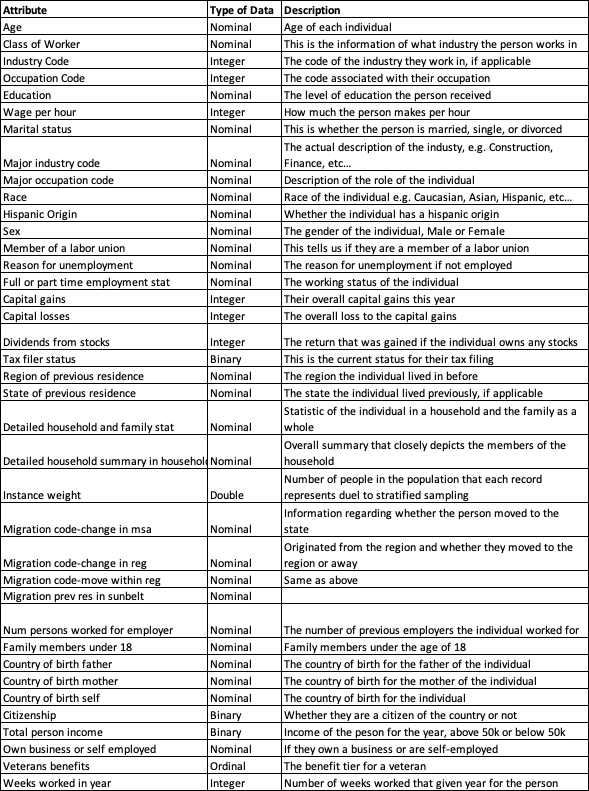


#### [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.

In [2]:
#Importing the libraries we need for this analysis

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
style.use('bmh') ## style for charts

In [3]:
## from: https://www2.1010data.com/documentationcenter/prod/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html
header_names = [
    'age',
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'wage_per_hour',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'instance_weight', ## this field is not used as a feature
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'num_emp',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'weeks_worked',
    'year',
    'income_50k',
]

In [4]:
df = pd.read_csv('/Users/password1234/Documents/Machine Learning/census-income.data.csv', header = None, names = header_names)
df_test = pd.read_csv('/Users/password1234/Documents/Machine Learning/census-income.test.csv', header = None, names = header_names)
df = pd.concat([df, df_test]) #The test file, labeled so it can be merged with original 
df.drop(columns = ['instance_weight'])
df.shape

(299285, 42)

As seen above, we have a total of 299285 observations for our dataset. This is the combination between both the test and train dataset.

In [5]:
categorical_features = [
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'year',
]
continuous_features = [
    'age', 
    'wage_per_hour',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'num_emp',
    'weeks_worked',
  ]
df[categorical_features] = df[categorical_features].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 42 columns):
age                 299285 non-null int64
class_worker        299285 non-null category
det_ind_code        299285 non-null category
det_occ_code        299285 non-null category
education           299285 non-null category
wage_per_hour       299285 non-null int64
hs_college          299285 non-null category
marital_stat        299285 non-null category
major_ind_code      299285 non-null category
major_occ_code      299285 non-null category
race                299285 non-null category
hisp_origin         299285 non-null category
sex                 299285 non-null category
union_member        299285 non-null category
unemp_reason        299285 non-null category
full_or_part_emp    299285 non-null category
capital_gains       299285 non-null int64
capital_losses      299285 non-null int64
stock_dividends     299285 non-null int64
tax_filer_stat      299285 non-null category
regio

#### [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [7]:
#The below code is to get some simple statistics for all of the continuous variables
df.describe()

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,instance_weight,num_emp,weeks_worked
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,55.105027,431.742176,36.849010,195.851259,1740.101125,1.956172,23.178375
std,22.318468,273.340729,4670.768536,269.789771,1937.847082,994.144299,2.364857,24.404016
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,1060.490000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1617.110000,1.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2188.110000,4.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,52.000000


The above tables shows the simple statistics for each of the continuous numeric variables. This is a dataset that has only a finite amount of numeric variables, which  adds a little bit of more weight to the overall analysis. 

As per the above results, we can see that the average age is 34.5 and with an average wage of $55. Some other notable data that we would like to point out is the number of employers an individual had in the year (2000). The average is about two employers within the span of a year, which is fairly common. 

In [8]:
#We also want to get some simple stats for all the categorical variables
df.describe(include = 'category')

,class_worker,det_ind_code,det_occ_code,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,...,mig_prev_sunbelt,fam_under_18,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,year
count,299285,299285,299285,299285,299285,299285,299285,299285,299285,299285,...,299285,299285,299285,299285,299285,299285,299285,299285,299285,299285
unique,9,52,47,17,3,7,24,15,5,10,...,4,5,43,43,43,5,3,3,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
freq,150324,150967,150967,72554,280367,129628,150967,150967,250978,257830,...,149642,216626,238531,240492,265342,265347,270860,296274,225427,149643


The above table provides information about the categorical variables in this dataset. As seen, there is quite a bit of variables. This makes sense because this is a census data so there will be information regarding the general information of an individual which is nominal. 

Some initial things that stand out per the categorical variables is that there is alot unique values for country of the father, mother, and individual. There is also a high influx of high school graduates as its one of the top observations for the education category. 

#### [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

#### [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

#### [5 points] Are there other features that could be added to the data or created from existing features? Which ones?

## Exceptional Work

### Sources

UCI Citation for dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[Direct Link to Census-Income Dataset](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29).

[History of the Current Population Survey](https://www.census.gov/programs-surveys/cps/about/history-of-the-cps.html).

[Methodology of the Current Population Survey](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology.html)

[Current Population Survey: Supplemental Survey Topics](https://www.census.gov/programs-surveys/cps/about/supplemental-surveys.html)